<a target="_blank" href="https://colab.research.google.com/github/huseyinegg/IE423-2024SUMMER/blob/main/M.HuseyinBeyribey_IE423_TASK5.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Initialize

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
fashion_mnist_data = pd.read_csv('data/mnist_fashion_train.csv')
fashion_mnist_data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,119,114,130,76,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,33,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
fashion_mnist_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 359.3 MB


In [ ]:
fashion_mnist_data.isna().sum()

label    0
1x1      0
1x2      0
1x3      0
1x4      0
        ..
28x24    0
28x25    0
28x26    0
28x27    0
28x28    0
Length: 785, dtype: int64

In [ ]:
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

y = fashion_mnist_data['label']
X = scale(fashion_mnist_data.drop(['label'], axis=1))

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=1)

## Analyze Data

Handwriting 				 Label
AxesImage(shape=(28, 28)) 		 9


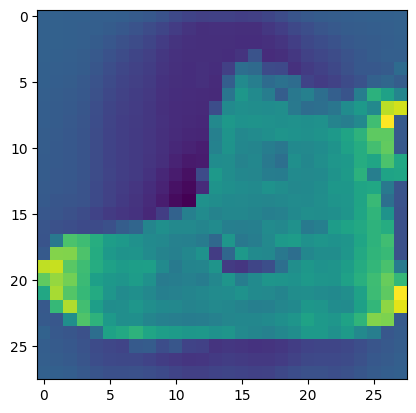

In [ ]:
print('Handwriting', '\t\t\t\t', 'Label')
print(plt.imshow(X[0].reshape((28,28))), '\t\t', y[0])

<Axes: ylabel='count'>

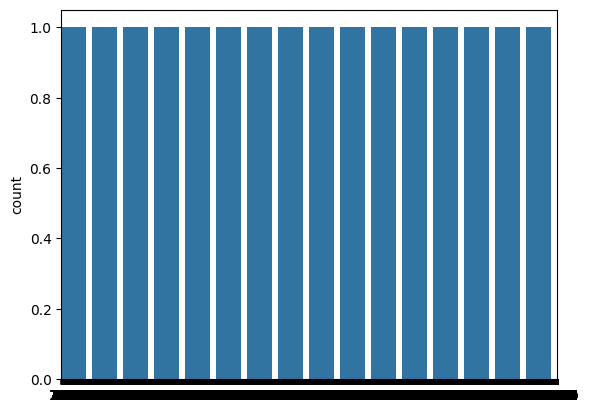

In [ ]:
sns.countplot(y)

## Predict Digit from Handwriting

At task 4, I have applied several classification models. Such as Logistic Regression, Naive Bayes Classifier, K-Nearest Neighbor (KNN), Support Vector Machines, Gradient Boosting, BalancedRandom Forest, XGBoost. Now I will combine all of them into one code, and apply for classification.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

fashion_mnist_data = pd.read_csv('data/mnist_fashion_train.csv')

y = fashion_mnist_data['label']
X = scale(fashion_mnist_data.drop(['label'], axis=1))

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=1)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=10000, random_state=1),
    'Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(probability=True, random_state=1),
    'Gradient Boosting': GradientBoostingClassifier(random_state=1),
    'Random Forest': RandomForestClassifier(class_weight='balanced', random_state=1),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=1)
}

# Evaluate models using cross-validation
results = {}
for name, model in models.items():
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    auc_score = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')

    results[name] = {
        'Confusion Matrix': conf_matrix,
        'Classification Report': report,
        'AUC Score': auc_score,
        'Cross-Validation Scores': cv_scores,
        'Mean CV Score': cv_scores.mean(),
        'Accuracy': accuracy
    }

    print(f'--- {name} ---')
    print(f'Cross-Validation Scores: {cv_scores}')
    print(f'Mean CV Score: {cv_scores.mean()}')
    print(f'Accuracy: {accuracy}')
    print(f'Classification Report:\n{report}')
    print(f'Confusion Matrix:\n{conf_matrix}')
    print(f'AUC Score: {auc_score}')
    print()

results

--- Logistic Regression ---
Cross-Validation Scores: [0.83791667 0.83135417 0.83604167 0.84447917 0.84125   ]
Mean CV Score: 0.8382083333333334
Accuracy: 0.8428333333333333
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.81      0.80      1166
           1       0.95      0.97      0.96      1213
           2       0.76      0.73      0.74      1232
           3       0.85      0.86      0.85      1209
           4       0.72      0.79      0.76      1159
           5       0.93      0.92      0.93      1217
           6       0.62      0.57      0.60      1178
           7       0.91      0.93      0.92      1215
           8       0.93      0.91      0.92      1178
           9       0.94      0.93      0.93      1233

    accuracy                           0.84     12000
   macro avg       0.84      0.84      0.84     12000
weighted avg       0.84      0.84      0.84     12000

Confusion Matrix:
[[ 939    8   30   59    3 

/Users/huseyin/.virtualenvs/Pythonnn3/skit_learn_env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [04:10:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/huseyin/.virtualenvs/Pythonnn3/skit_learn_env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [04:12:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/huseyin/.virtualenvs/Pythonnn3/skit_learn_env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [04:15:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/huseyin/.virtualenvs/Pythonnn3/skit_learn_env/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [04:17:57] WARNING: /Users/runner/work/xgboost/xgb

--- XGBoost ---
Cross-Validation Scores: [0.89760417 0.895625   0.89791667 0.90083333 0.89989583]
Mean CV Score: 0.898375
Accuracy: 0.9043333333333333
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1166
           1       0.99      0.98      0.99      1213
           2       0.84      0.84      0.84      1232
           3       0.91      0.91      0.91      1209
           4       0.83      0.87      0.85      1159
           5       0.98      0.97      0.98      1217
           6       0.76      0.69      0.72      1178
           7       0.95      0.96      0.95      1215
           8       0.98      0.97      0.98      1178
           9       0.96      0.96      0.96      1233

    accuracy                           0.90     12000
   macro avg       0.90      0.90      0.90     12000
weighted avg       0.90      0.90      0.90     12000

Confusion Matrix:
[[1026    1   19   26    1    2   88    0    3   

{'Logistic Regression': {'Confusion Matrix': array([[ 939,    8,   30,   59,    3,    2,  112,    1,   12,    0],
         [   4, 1179,    5,   18,    2,    0,    4,    1,    0,    0],
         [  22,    7,  896,    9,  170,    1,  121,    2,    4,    0],
         [  30,   26,   14, 1038,   49,    0,   37,    0,   14,    1],
         [   3,    1,   97,   35,  917,    4,   94,    1,    7,    0],
         [   1,    3,    1,    1,    1, 1122,    1,   50,    6,   31],
         [ 177,    9,  126,   50,  112,    1,  670,    0,   33,    0],
         [   0,    0,    0,    0,    0,   39,    0, 1132,    5,   39],
         [  12,    5,    8,   14,   12,    8,   33,    7, 1073,    6],
         [   0,    0,    1,    0,    0,   30,    1,   52,    1, 1148]]),
  'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.79      0.81      0.80      1166\n           1       0.95      0.97      0.96      1213\n           2       0.76      0.73      0.74      1

## Neural Networks

https://www.makariev.com/blog/fashion-MNIST-in-csv/

| Label | Description  |
|-------|--------------|
| 0     | T-shirt/top  |
| 1     | Trouser      |
| 2     | Pullover     |
| 3     | Dress        |
| 4     | Coat         |
| 5     | Sandal       |
| 6     | Shirt        |
| 7     | Sneaker      |
| 8     | Bag          |
| 9     | Ankle boot   |

## Using pyTorch

why did I normalize the pixel values? my reference

https://stackoverflow.com/questions/63746182/correct-way-of-normalizing-and-scaling-the-mnist-dataset

In [ ]:
import torchvision.transforms as transforms

fashion_mnist_data = pd.read_csv('mnist_fashion_train.csv')

y = fashion_mnist_data['label'].ravel()
X = scale(fashion_mnist_data.drop(['label'], axis=1))

print('Min Pixel Value: {} \nMax Pixel Value: {}'.format(trainset.data.min(), trainset.data.max()))
print('Mean Pixel Value {} \nPixel Values Std: {}'.format(trainset.data.float().mean(), trainset.data.float().std()))
print('Scaled Mean Pixel Value {} \nScaled Pixel Values Std: {}'.format(trainset.data.float().mean() / 255, trainset.data.float().std() / 255))

train_loader = torch.utils.data.DataLoader(
        datasets.MNIST('./data', train=True
        transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((trainset.data.float().mean() / 255,), (trainset.data.float().std(),))
        ])),

Applied into complete code

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score
import torchvision.transforms as transforms
import numpy as np
from sklearn.preprocessing import label_binarize

fashion_mnist_data = pd.read_csv('mnist_fashion_train.csv')

y = fashion_mnist_data['label'].values
X = fashion_mnist_data.drop(['label'], axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).reshape(-1, 1, 28, 28)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).reshape(-1, 1, 28, 28)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

mean = X_train_tensor.mean().item()
std = X_train_tensor.std().item()

# Apply transforms
transform = transforms.Compose([
    transforms.Normalize((mean,), (std,))
])

# Create custom dataset to apply transforms
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, data, labels, transform=None):
        self.data = data
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        sample = self.data[idx]
        if self.transform:
            sample = self.transform(sample)
        return sample, self.labels[idx]

# Create DataLoader
train_dataset = CustomDataset(X_train_tensor, y_train_tensor, transform=transform)
test_dataset = CustomDataset(X_test_tensor, y_test_tensor, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Define the Neural Network
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)  # 10 classes for Fashion-MNIST
        self.relu = nn.ReLU()

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten the input
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        return x

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = NeuralNetwork().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
num_epochs = 50
model.train()
for epoch in range(num_epochs):
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluating the model
model.eval()
with torch.no_grad():
    y_test_pred_scores = model(X_test_tensor.to(device)).cpu()
    y_test_pred_class = torch.argmax(y_test_pred_scores, dim=1)

report = classification_report(y_test, y_test_pred_class.numpy(), target_names=[
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
])

# Convert y_test to one-hot encoding
y_test_one_hot = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

roc_auc = roc_auc_score(y_test_one_hot, y_test_pred_scores.numpy(), multi_class='ovr')

output_text = (
    "Final Model Classification Report:\n" + report + "\n" +
    f"Final Model ROC AUC Score: {roc_auc:.4f}"
)

print(output_text)

with open("model_evaluation_torch_fashion_mnist.txt", "w") as file:
    file.write(output_text)

**Output**

Final Model Classification Report (PyTorch):
```
              precision    recall  f1-score   support

 T-shirt/top       0.81      0.85      0.83      1769
     Trouser       0.99      0.98      0.98      1835
    Pullover       0.83      0.78      0.80      1801
       Dress       0.87      0.90      0.89      1789
        Coat       0.80      0.83      0.81      1815
      Sandal       0.97      0.95      0.96      1783
       Shirt       0.73      0.69      0.71      1811
     Sneaker       0.95      0.91      0.93      1759
         Bag       0.96      0.96      0.96      1825
  Ankle boot       0.92      0.97      0.95      1813

    accuracy                           0.88     18000
   macro avg       0.88      0.88      0.88     18000
weighted avg       0.88      0.88      0.88     18000
```

Final Model ROC AUC Score (PyTorch): 0.9840

Both MLPClassifier and pyTorch are Neural Networks (supervised) , but their flexibility is different. Now I will apply MLPClassifier into same code and will compare their speed, and performance. Also, I will apply cross-valudation for both method.

In [ ]:
import time
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score
import torchvision.transforms as transforms
from sklearn.neural_network import MLPClassifier
import numpy as np  # Add this import

fashion_mnist_data = pd.read_csv('mnist_fashion_train.csv')

y = fashion_mnist_data['label'].values
X = fashion_mnist_data.drop(['label'], axis=1).values

scaler = StandardScaler()
X = scaler.fit_transform(X)

# Define the Neural Network for PyTorch
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(X.shape[1], 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)  # 10 classes for Fashion-MNIST
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        return x

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Cross-validation for PyTorch model
kf = KFold(n_splits=5, shuffle=True, random_state=42)
pytorch_cv_scores = []

for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

    # Convert to PyTorch tensors
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train, dtype=torch.long)
    X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
    y_val_tensor = torch.tensor(y_val, dtype=torch.long)

    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

    model_torch = NeuralNetwork().to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model_torch.parameters(), lr=0.001)

    # Training the model
    num_epochs = 50
    model_torch.train()
    for epoch in range(num_epochs):
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            # Forward pass
            outputs = model_torch(inputs)
            loss = criterion(outputs, labels)

            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

    # Evaluating the model
    model_torch.eval()
    with torch.no_grad():
        y_val_pred = model_torch(X_val_tensor.to(device)).cpu()
        y_val_pred_class = torch.argmax(y_val_pred, dim=1)
        accuracy = accuracy_score(y_val, y_val_pred_class.numpy())
        pytorch_cv_scores.append(accuracy)

print(f"Cross-Validation Scores (PyTorch): {pytorch_cv_scores}")
print(f"Mean Cross-Validation Score (PyTorch): {np.mean(pytorch_cv_scores):.4f}")

# Train final PyTorch model on full training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

model_torch = NeuralNetwork().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_torch.parameters(), lr=0.001)

print("Training final PyTorch Model...")
start_time = time.time()
model_torch.train()
for epoch in range(num_epochs):
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward pass
        outputs = model_torch(inputs)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

end_time = time.time()
pytorch_training_time = end_time - start_time
print(f"PyTorch Model Training Time: {pytorch_training_time:.2f} seconds")

# Evaluating the final PyTorch model
model_torch.eval()
with torch.no_grad():
    y_test_pred = model_torch(X_test_tensor.to(device)).cpu()
    y_test_pred_class = torch.argmax(y_test_pred, dim=1)

report = classification_report(y_test, y_test_pred_class.numpy(), target_names=[
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
])

# Calculate ROC AUC score using raw prediction scores
roc_auc = roc_auc_score(pd.get_dummies(y_test), y_test_pred.numpy(), multi_class='ovr')

output_text = (
    "Final Model Classification Report (PyTorch):\n" + report + "\n" +
    f"Final Model ROC AUC Score (PyTorch): {roc_auc:.4f}"
)

print(output_text)

with open("model_evaluation_torch.txt", "w") as file:
    file.write(output_text)

# Cross-validation for scikit-learn MLPClassifier
print("Training scikit-learn MLPClassifier with cross-validation...")
mlp_clf = MLPClassifier(max_iter=500, random_state=1, hidden_layer_sizes=(100,100))
sklearn_cv_scores = cross_val_score(mlp_clf, X, y, cv=5)

print(f"Cross-Validation Scores (scikit-learn MLPClassifier): {sklearn_cv_scores}")
print(f"Mean Cross-Validation Score (scikit-learn MLPClassifier): {np.mean(sklearn_cv_scores):.4f}")

print("Training final scikit-learn MLPClassifier...")
start_time = time.time()
mlp_clf.fit(X_train, y_train)
y_test_pred_sk = mlp_clf.predict(X_test)
end_time = time.time()

sklearn_training_time = end_time - start_time
print(f"scikit-learn MLPClassifier Training Time: {sklearn_training_time:.2f} seconds")

report_sk = classification_report(y_test, y_test_pred_sk, target_names=[
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
])

print("Classification Report (scikit-learn MLPClassifier):")
print(report_sk)

with open("model_evaluation_sklearn.txt", "w") as file:
    file.write("Final Model Classification Report (scikit-learn MLPClassifier):\n" + report_sk)

print(f"PyTorch Model Training Time: {pytorch_training_time:.2f} seconds")
print(f"scikit-learn MLPClassifier Training Time: {sklearn_training_time:.2f} seconds")
print(f"Cross-Validation Scores (PyTorch): {pytorch_cv_scores}")
print(f"Mean Cross-Validation Score (PyTorch): {np.mean(pytorch_cv_scores):.4f}")
print(f"Cross-Validation Scores (scikit-learn MLPClassifier): {sklearn_cv_scores}")
print(f"Mean Cross-Validation Score (scikit-learn MLPClassifier): {np.mean(sklearn_cv_scores):.4f}")


**Output**

Cross-Validation Scores (PyTorch): [0.8876666666666667, 0.8835, 0.8910833333333333, 0.8845833333333334, 0.8860833333333333]\
Mean Cross-Validation Score (PyTorch): 0.8866\
Training final PyTorch Model...\
Epoch [10/50], Loss: 0.1090\
Epoch [20/50], Loss: 0.1071\
Epoch [30/50], Loss: 0.0946\
Epoch [40/50], Loss: 0.0101\
Epoch [50/50], Loss: 0.3497\
PyTorch Model Training Time: 249.59 seconds\



Final Model Classification Report (PyTorch):
```
              precision    recall  f1-score   support

 T-shirt/top       0.81      0.85      0.83      1769
     Trouser       0.99      0.98      0.98      1835
    Pullover       0.83      0.78      0.80      1801
       Dress       0.87      0.90      0.89      1789
        Coat       0.80      0.83      0.81      1815
      Sandal       0.97      0.95      0.96      1783
       Shirt       0.73      0.69      0.71      1811
     Sneaker       0.95      0.91      0.93      1759
         Bag       0.96      0.96      0.96      1825
  Ankle boot       0.92      0.97      0.95      1813

    accuracy                           0.88     18000
   macro avg       0.88      0.88      0.88     18000
weighted avg       0.88      0.88      0.88     18000
```

Final Model ROC AUC Score (PyTorch): 0.9840\
Training scikit-learn MLPClassifier with cross-validation...\
Cross-Validation Scores (scikit-learn MLPClassifier): [0.88908333 0.88383333 0.8875     0.88741667 0.883     ]\
Mean Cross-Validation Score (scikit-learn MLPClassifier): 0.8862\
Training final scikit-learn MLPClassifier...\
scikit-learn MLPClassifier Training Time: 161.56 seconds


Classification Report (scikit-learn MLPClassifier):
```
              precision    recall  f1-score   support

 T-shirt/top       0.84      0.84      0.84      1769
     Trouser       0.98      0.98      0.98      1835
    Pullover       0.75      0.87      0.81      1801
       Dress       0.87      0.92      0.89      1789
        Coat       0.85      0.76      0.80      1815
      Sandal       0.96      0.96      0.96      1783
       Shirt       0.76      0.68      0.72      1811
     Sneaker       0.94      0.95      0.94      1759
         Bag       0.97      0.96      0.96      1825
  Ankle boot       0.95      0.96      0.96      1813

    accuracy                           0.89     18000
   macro avg       0.89      0.89      0.89     18000
weighted avg       0.89      0.89      0.89     18000

```
PyTorch Model Training Time: 249.59 seconds\
scikit-learn MLPClassifier Training Time: 161.56 seconds\
Cross-Validation Scores (PyTorch): [0.8876666666666667, 0.8835, 0.8910833333333333, 0.8845833333333334, 0.8860833333333333]\
Mean Cross-Validation Score (PyTorch): 0.8866\
Cross-Validation Scores (scikit-learn MLPClassifier): [0.88908333 0.88383333 0.8875     0.88741667 0.883     ]\
Mean Cross-Validation Score (scikit-learn MLPClassifier): 0.8862

### Deep Neural Networks with MLPClassifier

In [ ]:
%%time

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

mdlDncDgt = MLPClassifier(hidden_layer_sizes=(100,100))
mdlDncDgt.fit(X_train, y_train)
y_test_pred = mdlDncDgt.predict(X_test)

print ('Classification Report (Deep Neural Network):')
print (classification_report(y_test, y_test_pred))

print("Cross-Valudation score: {}".format(cross_val_score(mdlDncDgt, X, y, cv=5)))

Classification Report (Deep Neural Network):
              precision    recall  f1-score   support

           0       0.82      0.84      0.83      1166
           1       0.98      0.99      0.98      1213
           2       0.81      0.80      0.81      1232
           3       0.91      0.88      0.89      1209
           4       0.79      0.86      0.82      1159
           5       0.96      0.95      0.96      1217
           6       0.75      0.70      0.72      1178
           7       0.93      0.95      0.94      1215
           8       0.97      0.96      0.96      1178
           9       0.95      0.95      0.95      1233

    accuracy                           0.89     12000
   macro avg       0.89      0.89      0.89     12000
weighted avg       0.89      0.89      0.89     12000

Cross-Valudation score: [0.88316667 0.88241667 0.88883333 0.88941667 0.88783333]
CPU times: user 10min 48s, sys: 1min 7s, total: 11min 55s
Wall time: 6min 1s


In [ ]:
from sklearn.metrics import roc_auc_score

y_test_prob = mdlDncDgt.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, y_test_prob, multi_class='ovr')
print("ROC AUC score: {}".format(roc_auc))

ROC AUC score: 0.9904081526994275


Scikit-learn's `MLPClassifier` requires less code for defining the model and training loop, on the other hand PyTorch offers more flexibility in defining custom neural networks but requires more detailed implementation of the training process. From the code we have seen MLPClassifier works faster, and Cross-Validation Scores a little bit better. It may due to my inadequency in applying PyTorch Neural Networks, because at the end both uses same algorithms.(Both can represent multi-layer perceptrons (MLPs) with various hidden layers and neurons. Also both use backpropagation to compute gradients and update weights and both involve forward passes to compute predictions and backward passes to update model parameters based on the loss function.)